In [45]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import itertools



# Excerise 4
In this exercise you will get some hands on experience with applying SVM and Random Forests algorithms for classification problems. For understanding a bit better the theoretical part of SVM, you will practice a concrete example of using a kernel to get a linear separability in a higher dimension. You will then apply a Decision Tree classsifier and random forest on the MNIST hand written digits dataset that we already saw.

As a bonus you are invited to look at an interesting (and relatively easy to play with due to small size data files) Kaggle competition --- "welcome to the real world" ;)

## SVM with a polynomial kernel

You are given data $x=(x_1,x_2)\in\mathbb{R}^2$ that is known to be labeled using the function
$$
y = \text{sign}(3x_1^2 - x_2 - 2)
$$


### Question 1
Use the polynomial transformation into a higher dimensional space, with a polynomial degree 2, and write down a separating hyperplane **in that higher dimension** such that all the samples will be classified correctly. That is, find $w$ and $b$ such that
$$
\forall(x,y):\,\,\,\text{sign}(w^T\phi(x)+b)=y
$$
where 
$$
\phi(x)=\phi(x_1,x_2)=(1, x_1^2, x_2^2, \sqrt{2}x_1, \sqrt{2}x_2, \sqrt{2}x_1x_2)
$$


### Answer 1
We are looking for $w$ and $b$ such that:
$$\textrm{sign}(w^T\phi(x)+b) = \textrm{sign}(3x_1^2-x_2-2)$$
$$(w_0, w_1, w_2, w_3, w_4, w_5)^T\cdot(1, x_1^2, x_2^2, \sqrt{2}x_1, \sqrt{2}x_2, \sqrt{2}x_1x_2) + b = 3x_1^2-x_2-2$$

With
$$\begin{align}w &= (0, 3, 0, 0, -\dfrac{\sqrt{2}}{2}, 0)\\
b &= -2\end{align}$$
The equation is satisfied.

### Question 2
Using the result above, we know there is a linear separating hyperplane in the 2-degree polynomial higher dimension space. That means we should be able to use SVM with a polynomial kernel of degree 2 to perfectly separate the classes.

- Apply such SVM on the 4 points sample set provided below (make sure to set `coef0=1`)
- Draw the resulting separarting hyperplane and show the support vectors in the original 2D space.
- Compare the results with the true function that generates that data.
- Create a new training data set with 100 samples (use the provided function) and repeat the steps above. Did your results change? What about 500 samples?
- How does the number of support vectors relative to the sample set size changes as you increase the sample set size? What does it mean?
- Write your conclusions.

In [2]:
def true_boundary(x1, x2):
    return 3*x1**2 - x2 - 2

def generate_data(m, seed=None):
    # if seed is not None, this function will always generate the same data
    np.random.seed(seed)
    X1 = np.random.uniform(low=-2.0, high=2.0, size=(m,1))
    X2 = np.random.uniform(low=-3.0, high=9.0, size=(m,1))
    X = np.hstack((X1, X2))
    y = np.sign(true_boundary(X[:,0], X[:,1]))
    y[y==0] = 1  
    return X, y

def plot_labeled_data(X, y):
    plt.scatter(X[(y==1),0], X[(y==1),1], c='r')
    plt.scatter(X[(y==-1),0], X[(y==-1),1], c='b')  
    plt.xlim([-2, 2]);
    plt.ylim([-3, 9]);
    plt.plot(np.linspace(-2,2,100), true_boundary(np.linspace(-2,2,100), np.zeros(100)), linewidth=2, c='k');


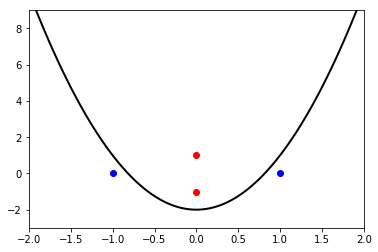

In [3]:
# the sample set
X = np.array([[-1,  0],
              [ 1,  0],
              [ 0, -1],
              [ 0,  1]])

y = np.array([-1,
              -1,
               1,
               1])

plot_labeled_data(X, y)

### Answer 2


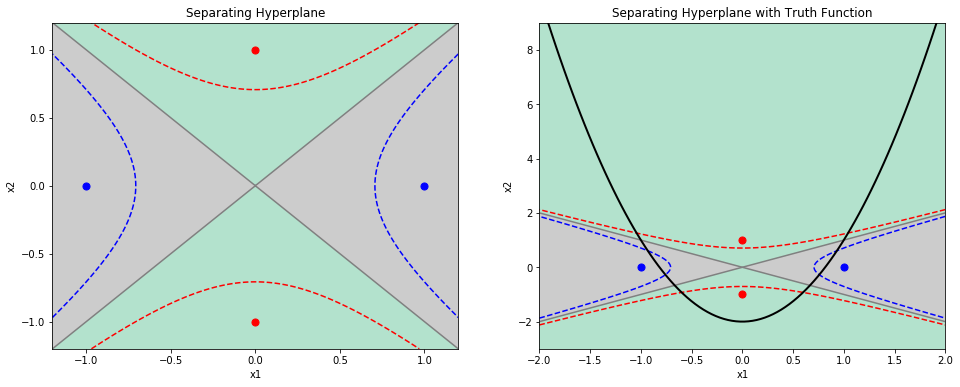

In [4]:
# Imports
from sklearn import svm

# Apply such SVM on the 4 points sample set
clf = svm.SVC(kernel='poly', coef0=1)
clf.fit(X, y)

# Draw the resulting separarting hyperplane and show the support vectors in the original 2D space
def plot_hyperplanes(X, y, clf, show_true_boundary=False):
    X0 = X[np.where(y == 1)]
    X1 = X[np.where(y == -1)]

    if show_true_boundary:
        x_min = -2
        x_max = 2
        y_min = -3
        y_max = 9

        plt.xlim([-2, 2]);
        plt.ylim([-3, 9]);
        plt.plot(np.linspace(-2,2,100), true_boundary(np.linspace(-2,2,100), np.zeros(100)), linewidth=2, c='k');
    else:
        x_min = X[:, 0].min()-0.2
        x_max = X[:, 0].max()+0.2
        y_min = X[:, 1].min()-0.2
        y_max = X[:, 1].max()+0.2

    XX, YY = np.mgrid[x_min:x_max:400j, y_min:y_max:1200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap='Pastel2_r')

    plt.contour(XX, YY, Z, colors=['b', 'grey', 'r'],
              linestyles=['--', '-', '--'],
              levels=[-.5, 0, .5])
    plt.scatter(X0[:, 0], X0[:, 1], c='r',s=50)
    plt.scatter(X1[:, 0], X1[:, 1], c='b',s=50)

    plt.xlabel('x1')
    plt.ylabel('x2')

def plot_hyperplanes_with_and_without_truth(X, y, clf):
    plt.subplots(1, 2, figsize=(16, 6))
    plt.subplot(1, 2, 1)
    plt.title('Separating Hyperplane')
    plot_hyperplanes(X, y, clf)

    # Compare the results with the true function that generates that data.
    plt.subplot(1, 2, 2)
    plt.title('Separating Hyperplane with Truth Function')
    plot_hyperplanes(X, y, clf, True)
    plt.show()

plot_hyperplanes_with_and_without_truth(X, y, clf)

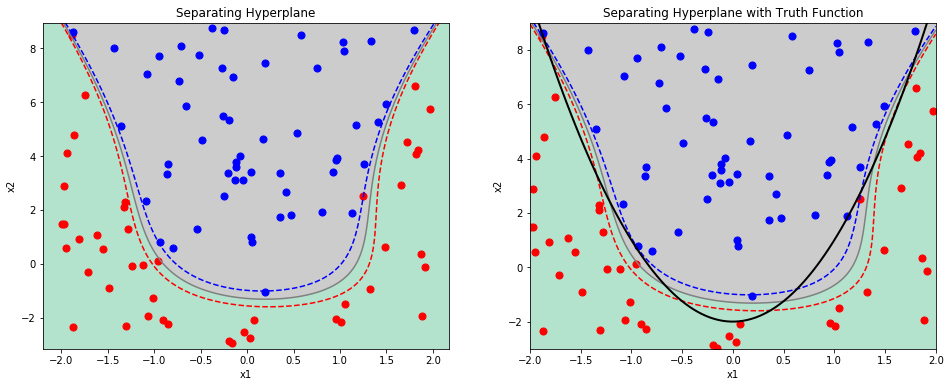

In [5]:
# Create a new training data set with 100 samples 
X_100, y_100 = generate_data(100)
clf_100 = svm.SVC(kernel='poly', coef0=1)
clf_100.fit(X_100, y_100)

plot_hyperplanes_with_and_without_truth(X_100, y_100, clf_100)


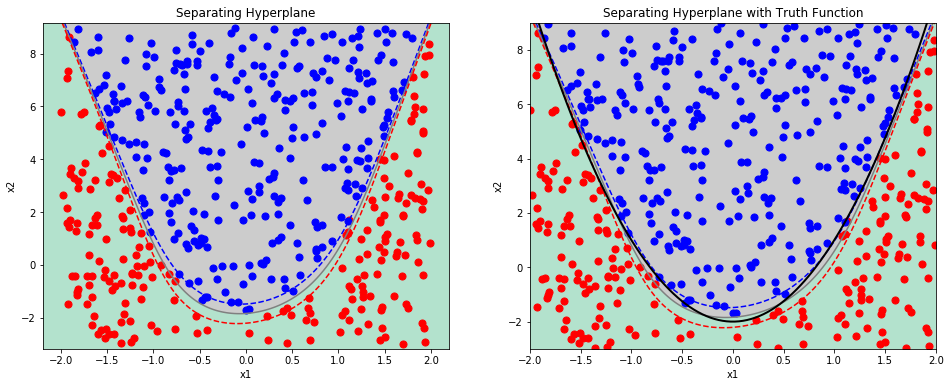

In [6]:
# Create a new training data set with 500 samples 
X_500, y_500 = generate_data(500)
clf_500 = svm.SVC(kernel='poly', coef0=1)
clf_500.fit(X_500, y_500)

plot_hyperplanes_with_and_without_truth(X_500, y_500, clf_500)


<font color='blue'>In the first example, with only 4 points, the separating hyperplane classifies very well the training data, but when compared to the truth function it has completely different decision boundaries. This is not surprising because many different polynomial vector machines could attain the right classification of the provided 4 points.
    
However, increasing the training data to 100 and 500 datapoints significantly improved the classifier, to the point that the classifier trained on 500 datapoints is able to classify the data almost perfectly according to the Truth function.

This demonstrates the importance of having a diverse dataset when building a Support Vector Machine classifier.</font>

## Using Decision Tree and Random Forest for Digits Classification
Remeber the MNIST dataset used in exercise 2 - you will now test the power of decision trees on this problem.
This time you are given a free hand in choosing the test and train set sizes, model parameters (such as gain function and constraints over the trees) and features (whether to use binary pixel values or the original continous gray value).
- Choose which model parameters you wish to optimize, explain how would you do that, and find a model which you believe would have the minimal generalization error --- do this for both a single decision tree model, and a random forest.
- Once you are satisfied with the model parameters, plot for each of the models (a single decision tree and random forest) the importance of each of the pixels to the final decision.
- Last, estimate the class assignment probabilities for all the correctly classified and misclassified examples in your test data.
- Discuss your results.

In [108]:
# Load datasets
test_data = np.load('../MNIST/test_data.npy')
test_labels = np.load('../MNIST/test_labels.npy')
train_data = np.load('../MNIST/train_data.npy')
train_labels = np.load('../MNIST/train_labels.npy')

# Concatenate data from train and test sources
X = np.concatenate((train_data, test_data), axis=0)
y = np.concatenate((train_labels, test_labels), axis=0)

def binarize_pixels(X):
    return 1 * (X > 0)

def generate_models(X_train, y_train, tree_depth, criterion, binarize=False):
    # Binarize inputs (if needed)
    if binarize:
        X_train = binarize_pixels(X_train)
        
    # Create Classifier
    clf_tree = DecisionTreeClassifier(max_depth=tree_depth, criterion=criterion)
    clf_tree.fit(X_train, y_train)

    # Create Classifier
    clf_forest = RandomForestClassifier(max_depth=tree_depth, criterion=criterion)
    clf_forest.fit(X_train, y_train)

    return clf_tree, clf_forest

def plot_models(X, y, test_ratio, criterion, binarize):
    depths = [2, 4, 6, 8, 10,12,15,20, 25, 30, 40, 50]
    tree_train_errors,tree_test_errors = [], []
    forest_train_errors,forest_test_errors = [], []
    
    # Binarize inputs (if needed)
    if binarize:
        X = binarize_pixels(X)
    
    # Split up the data again according to our liking
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, shuffle=True)
    
    for tree_depth in depths:
        # Get Classifiers
        clf_tree, clf_forest = generate_models(X_train, y_train, tree_depth, criterion)
        
        # Error for decision tree classifier
        tree_train_errors.append(1-clf_tree.score(X_train, y_train))
        tree_test_errors.append(1-clf_tree.score(X_test, y_test))
        
        # Error for random forest classifier
        forest_train_errors.append(1-clf_forest.score(X_train, y_train))
        forest_test_errors.append(1-clf_forest.score(X_test, y_test))
    
    print('MODEL // Test Data Ratio: %.2f - Binarize Images: %r - %s' % (test_ratio, binarize, criterion))
    tree_best_error = min(tree_test_errors)
    tree_best_idx = tree_test_errors.index(min(tree_test_errors))
    forest_best_error = min(forest_test_errors)
    forest_best_idx = forest_test_errors.index(min(forest_test_errors))
    
    plt.subplots(1,2, figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(depths, tree_train_errors, '.-b', label='Training Sample')
    plt.plot(depths, tree_test_errors, '.-r', label='Test Sample')
    plt.xlabel('Tree Depth')
    plt.ylabel('Prediction Error')
    plt.legend(loc='upper right')
    plt.title('Decision Tree - best accuracy %.2f%% @ depth %d' % ((1-tree_best_error)*100, depths[tree_best_idx]))
    
    plt.subplot(1, 2, 2)
    plt.plot(depths, forest_train_errors, '.-b', label='Training Sample')
    plt.plot(depths, forest_test_errors, '.-r', label='Test Sample')
    plt.xlabel('Tree Depth')
    plt.ylabel('Prediction Error')
    plt.legend(loc='upper right')
    plt.title('Random Forest - best accuracy %.2f%% @ depth %d' % ((1-forest_best_error)*100, depths[forest_best_idx]))
    plt.show()
    


- Choose which model parameters you wish to optimize, explain how would you do that, and find a model which you believe would have the minimal generalization error --- do this for both a single decision tree model, and a random forest.

<font color='blue'>Let's play with the following parameters: 
- test/train dataset size
- binary or gray-scale pixels
- tree depth
- Gain function (gini vs entropy)

In order to do that, we will plot multiple configurations with 2 charts per row, one per classifier. 
Each chart will represent the generalization error according to the depth and each row will model different hyperparameters. 

We will then be able to compare the results and select the best model according to prediction errors.</font>

*** GENERALIZATION ERROR ***
MODEL // Test Data Ratio: 0.20 - Binarize Images: True - entropy


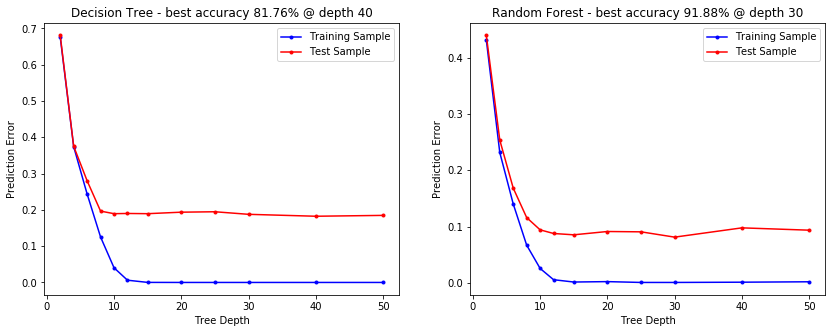

MODEL // Test Data Ratio: 0.20 - Binarize Images: True - gini


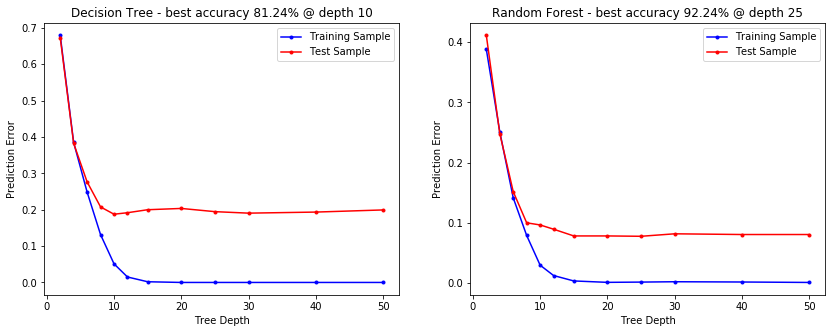

MODEL // Test Data Ratio: 0.20 - Binarize Images: False - entropy


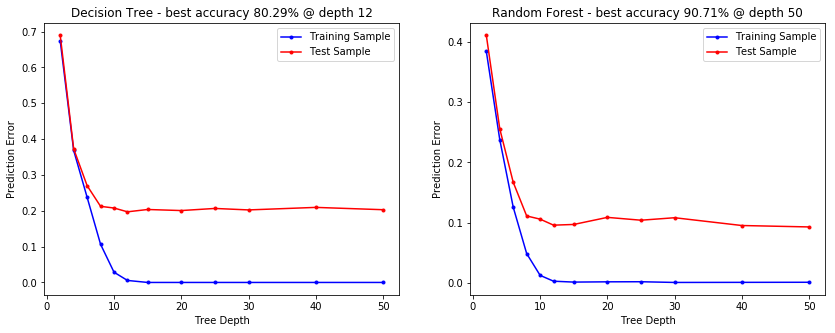

MODEL // Test Data Ratio: 0.20 - Binarize Images: False - gini


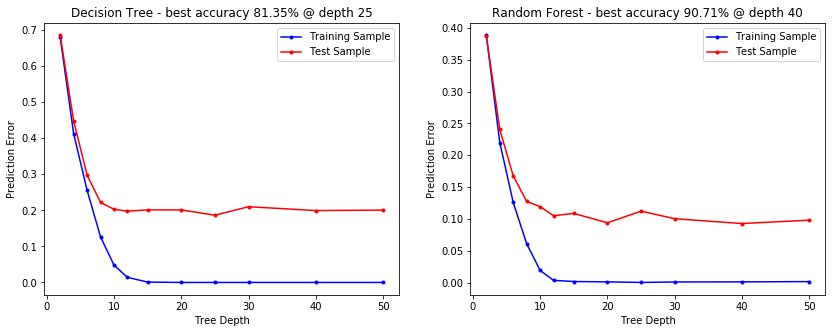

MODEL // Test Data Ratio: 0.10 - Binarize Images: True - entropy


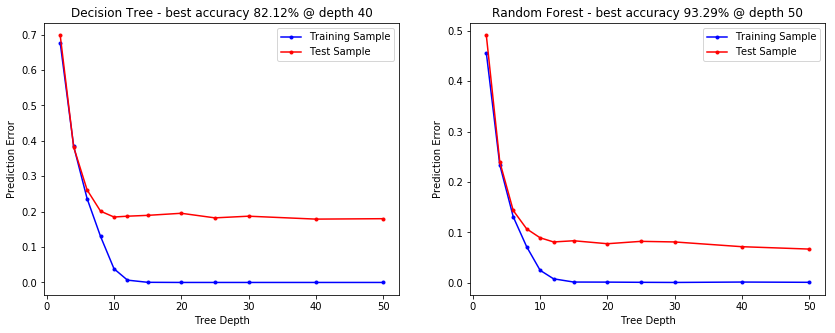

MODEL // Test Data Ratio: 0.10 - Binarize Images: True - gini


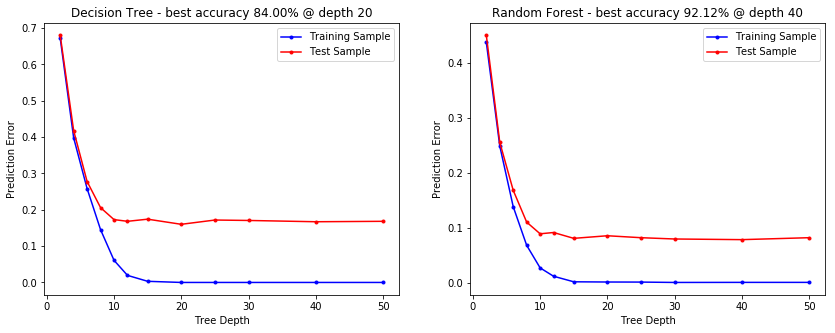

MODEL // Test Data Ratio: 0.10 - Binarize Images: False - entropy


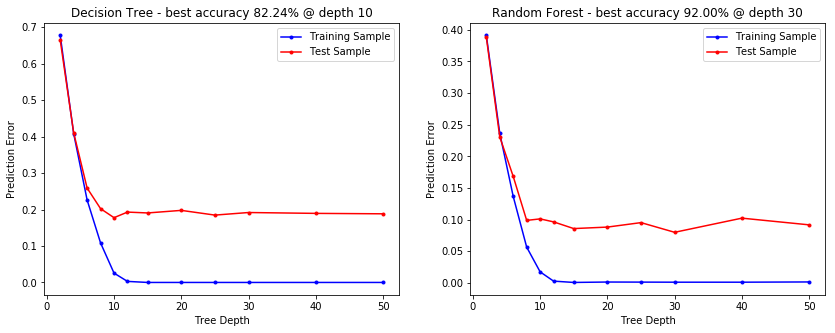

MODEL // Test Data Ratio: 0.10 - Binarize Images: False - gini


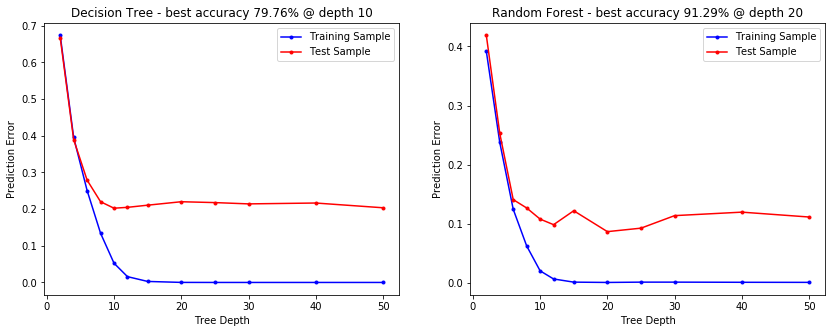

In [109]:
# Hyperparameters
test_ratio = 0.1
binarize = True
tree_depth = 12
criterion = 'entropy' # ['gini', 'entropy']

print('*** GENERALIZATION ERROR ***')

# Plot various combinations of hyperparameters
plot_models(X, y, 0.2, 'entropy', True)
plot_models(X, y, 0.2, 'gini', True)

plot_models(X, y, 0.2, 'entropy', False)
plot_models(X, y, 0.2, 'gini', False)

plot_models(X, y, 0.1, 'entropy', True)
plot_models(X, y, 0.1, 'gini', True)

plot_models(X, y, 0.1, 'entropy', False)
plot_models(X, y, 0.1, 'gini', False)


<font color='blue'>We select the following model:
- Test Data Ratio = 10%
- Binarize Images = False
- Tree Depth = 20
- Gain Function = Entropy</font>

*** PIXEL IMPORTANCE MATRIX ***


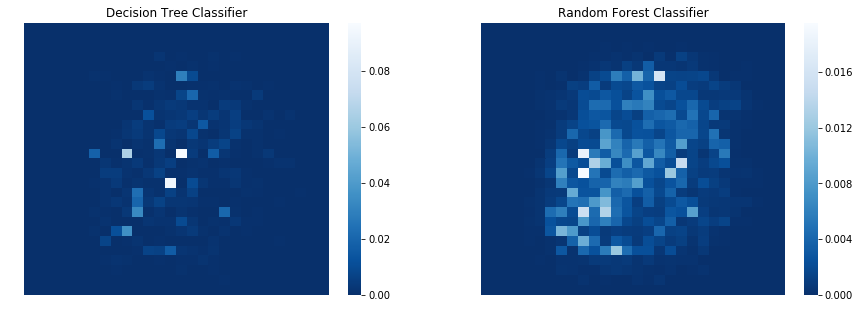

In [145]:
# Selected Model
test_ratio=0.1
binarize=False
depth=20
criterion='entropy'

# Split up the data again according to our liking
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)

# Train a model for both classifiers
selected_tree_clf, selected_forest_clf = generate_models(X_train, y_train, depth, criterion, binarize)

# Display importance matrix
print('*** PIXEL IMPORTANCE MATRIX ***')
plt.subplots(1,2, figsize=(15, 5))

plt.subplot(1,2,1)
plt.axis('off')
plt.title('Decision Tree Classifier')
importance = selected_tree_clf.feature_importances_.reshape(28,28)
sns.heatmap(importance, cmap=plt.cm.Blues_r)

plt.subplot(1,2,2)
plt.axis('off')
plt.title('Random Forest Classifier')
importance = selected_forest_clf.feature_importances_.reshape(28,28)
sns.heatmap(importance, cmap=plt.cm.Blues_r)

plt.show()

In [146]:
def plot_class_proba_matrix(probas_array, labels, title):
    df = pd.DataFrame(probas_array)
    df['label'] = labels
    df = df.groupby('label').mean()
    
    plt.imshow(df, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = df_correct_pred.index
    plt.xticks(tick_marks, range(df.shape[1]), rotation=45)
    plt.yticks(tick_marks, df.index)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    fmt = '.1f'
    for i, j in itertools.product(range(10), range(10)):
        plt.text(j, i, format(df.loc[i, j] if i in df.index else 0, fmt),horizontalalignment="center", color="white" if i in df.index and df.loc[i, j] > 0.5 else "black")


*** Class Assignment Probabilities ***


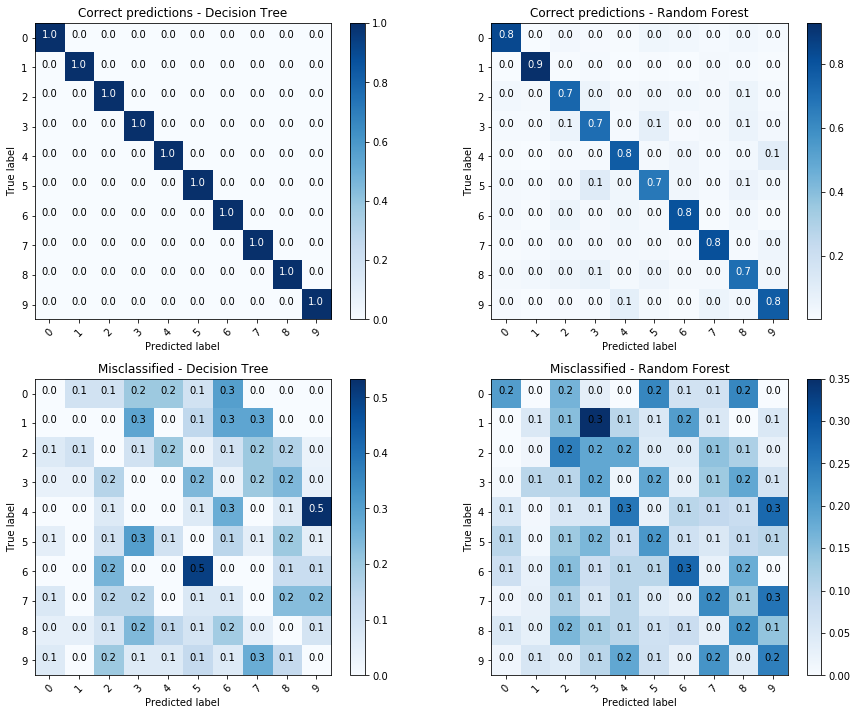

In [147]:
y_tree_pred = selected_tree_clf.predict(X_test)
y_tree_pred_prob = selected_tree_clf.predict_proba(X_test)

y_forest_pred = selected_forest_clf.predict(X_test)
y_forest_pred_prob = selected_forest_clf.predict_proba(X_test)

print('*** Class Assignment Probabilities ***')
plt.subplots(2,2, figsize=(15, 12))

# Correct Predictions
plt.subplot(2,2,1)
plot_class_proba_matrix(y_tree_pred_prob[y_test == y_tree_pred], y_test[y_test == y_tree_pred], 'Correct predictions - Decision Tree')
plt.subplot(2,2,2)
plot_class_proba_matrix(y_forest_pred_prob[y_test == y_forest_pred], y_test[y_test == y_forest_pred], 'Correct predictions - Random Forest')

# Misclassified Data
plt.subplot(2,2,3)
plot_class_proba_matrix(y_tree_pred_prob[y_test != y_tree_pred], y_test[y_test != y_tree_pred], 'Misclassified - Decision Tree')
plt.subplot(2,2,4)
plot_class_proba_matrix(y_forest_pred_prob[y_test != y_forest_pred], y_test[y_test != y_forest_pred], 'Misclassified - Random Forest')

plt.show()


<font color='blue'>We can derive the following conclusions from the Pixel importance matrix and the Class Assignment Probabilities:
- The decision tree algorithm bases its decision on a limited number of pixels
- The random forest algorithm bases its decision on much more pixels, most likely due to the 'ensemble' nature of this classifier which comprises several decision trees
- The decision tree is very accurate - 100% probability - in its correct predictions
- The decision tree is very inaccurate - 0% probability for the correct classes - in its misclassified items
- The random forest classifier, is not so self-confident about correct predictions, but often the incorrect predictions are in the 2nd most probable class

It seems that the Decision tree has no 'grey' zone, it either very correctly classifies an image, or misses completely.

It would be tempting to suggest adding boosting on top of the Decision tree in order to help the classifier focus on the misclassified data. But given the difference in accuracy with the Random Forest (about 10% of predictions), it is likely that the random forest is also very confident about the data that was correctly classified in Decision Tree, and that on top of that, it was able to correctly classify some more difficult images for which the decision tree failed completely.</font>

## Spooky Author Identification Kaggle Competition
The [competition](https://www.kaggle.com/c/spooky-author-identification) is over by now, but you are welcome to play with the data and see if you can get a high score.
A good place to start would be to review the public notebook [Benchmarking different Sklearn classifiers](https://www.kaggle.com/vonneumann/benchmarking-sklearn-classifiers).

## References
- https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/
- https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/
- https://www.analyticsvidhya.com/blog/2014/06/introduction-random-forest-simplified/